In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

In [35]:
def read_image_from_url(url):
    try:
        # Download the image using requests
        response = requests.get(url)
        if response.status_code == 200:
            # Convert the image content to a numpy array
            np_array = np.frombuffer(response.content, np.uint8)
            # Decode the numpy array to an image
            image = cv2.imdecode(np_array, cv2.IMREAD_COLOR)
            return image
        else:
            print("Error: Unable to download the image. Status code:", response.status_code)
            return None
    except Exception as e:
        print("Error:", e)
        return None

# Example usage:
url = "https://images.pexels.com/photos/206359/pexels-photo-206359.jpeg?cs=srgb&dl=pexels-pixabay-206359.jpg&fm=jpg"
image = read_image_from_url(url)

In [36]:
import win32api

screen_width = win32api.GetSystemMetrics(0)
screen_height = win32api.GetSystemMetrics(1)

# Resize the image to fit within the screen
max_width = int(0.8 * screen_width)  # Adjust this value as needed
max_height = int(0.8 * screen_height)  # Adjust this value as needed
image = cv2.resize(image, (max_width, max_height))

# Resize the window to match the resized image
cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Image', max_width, max_height)


if image is not None:
    cv2.imshow('Original Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [37]:
histogram = cv2.calcHist([image], [0], None, [256], [0,256])

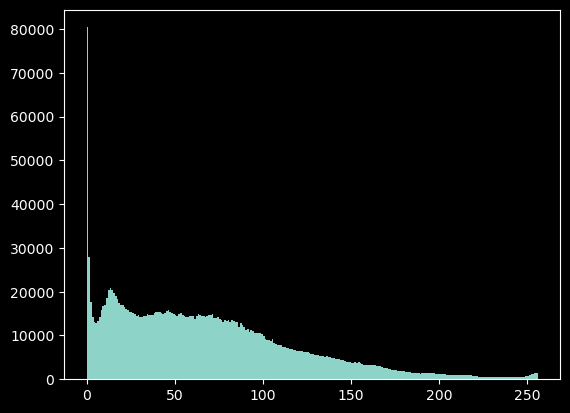

In [38]:
plt.style.use('dark_background')
plt.hist(image.ravel(), 256, [0,256]);
plt.show()

In [39]:
def color_tuple(a, b, c):
    return (a,b,c)

In [41]:
input1 = input('Enter first color : ')
input2 = input('Enter second color : ')
input3 = input('Enter third color : ')

Enter first color :  cyan
Enter second color :  orange
Enter third color :  purple


In [42]:
color = color_tuple(input1, input2, input3)

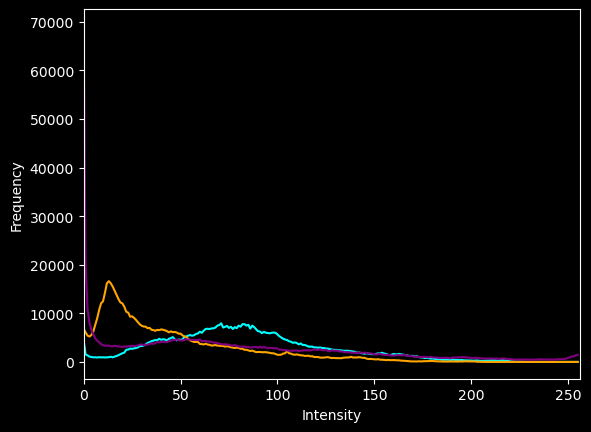

In [43]:
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()